In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

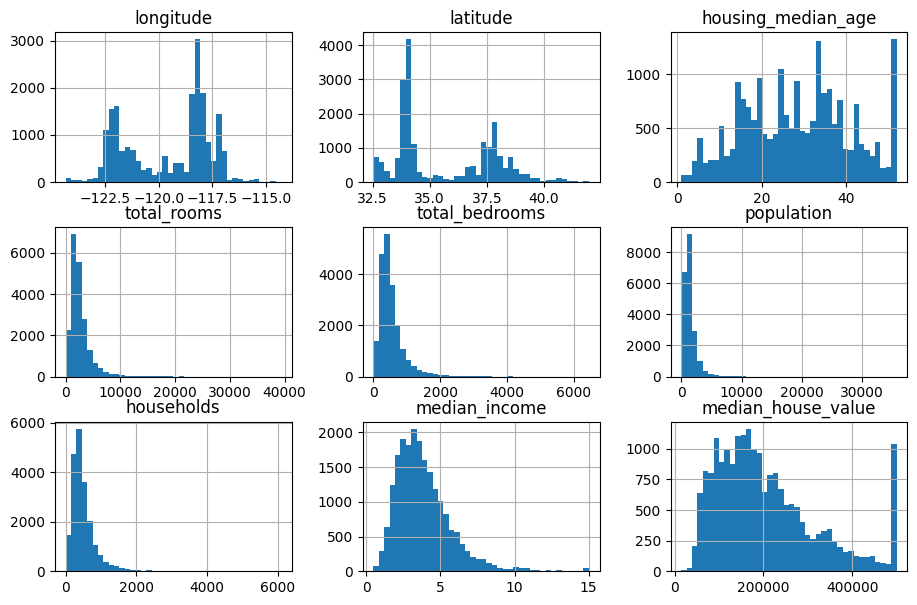

In [6]:
df.hist(bins=40 , figsize = (11,7))

In [7]:
# Test set

In [8]:
len(df)

20640

In [9]:
def shuffle_and_split_df(df, test_ratio):
    np.random.seed(40)
    random_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_indices = random_indices[:test_set_size]    # تست: اولی ها
    train_indices = random_indices[test_set_size:]   # تست: بعدی ها
    return df.iloc[train_indices], df.iloc[test_indices]  # تست اول، تست دوم

In [10]:
train_set, test_set = shuffle_and_split_df (df,0.2)

In [11]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN


In [12]:
from zlib import crc32

In [13]:
crc32(np.array([1,1]))

2390350426

In [14]:
def is_identifier_in_test_set(identifier , test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [15]:
def split_train_test_with_identifier_hash(df, test_ratio, identifier_colum):
    identifier = df[identifier_colum]
    in_test_set = identifier.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))  # ذخیره مقدار خروجی
    return df.loc[~in_test_set], df.loc[in_test_set]  # استفاده صحیح از in_test_set


In [16]:
train_set , test_set = split_train_test_with_identifier_hash(df.reset_index(),0.2,"index")

In [17]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
df_with_identifier = df
df_with_identifier["identifier"] = df["longitude"]*1000 + df ['latitude']

In [19]:
df_with_identifier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [20]:
train_set , test_set = split_train_test_with_identifier_hash(df.reset_index(),0.2,"identifier")

In [21]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [22]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...,...
20616,20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set , test_set=train_test_split(df,test_size=0.2,random_state=40)

In [25]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND,-120003.07
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND,-121001.00
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN,-118205.94
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN,-117886.36
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN,-118315.87
...,...,...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,<1H OCEAN,-118056.23
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,329200.0,NEAR BAY,-122442.25
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,100000.0,NEAR OCEAN,-117197.14
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,240200.0,<1H OCEAN,-117097.04


In [26]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN,-118105.82
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN,-121932.46
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN,-123800.17
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN,-121783.14
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN,-118295.95
...,...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN,-122831.57
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN,-117216.80
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN,-118395.77
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN,-118325.77


In [27]:
df["median_income_categories"] = pd.cut(df["median_income"], bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [28]:
df["median_income_categories"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income_categories, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: xlabel='median_income_categories'>

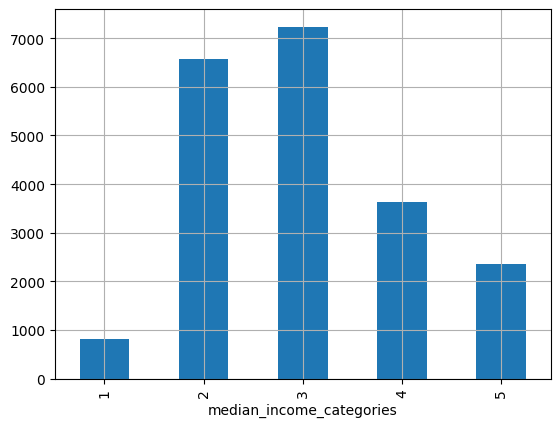

In [29]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid = True)

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=40)
stratified_split = []
for train_i , test_i in sss.split(df,df["median_income_categories"]):
  stratified_train_set_n = df.iloc[train_i]
  stratified_test_set_n = df.iloc[test_i]
  stratified_split.append([stratified_train_set_n ,stratified_test_set_n])

In [32]:
stratified_train_set , stratified_test_set = stratified_split[0]

In [33]:
stratified_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,2
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,2
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,4
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,3


In [34]:
stratified_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71,3
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96,2
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24,3
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06,2
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75,2
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46,2
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45,3
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10,2


In [35]:
stratified_test_set["median_income_categories"].value_counts()/len(stratified_test_set)

median_income_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [36]:
stratified_test_set ["median_income_categories"].value_counts()/len(stratified_train_set)

median_income_categories
3    0.087633
2    0.079700
4    0.044089
5    0.028585
1    0.009993
Name: count, dtype: float64

In [37]:
str_train_set , str_test_set=train_test_split(df,test_size=0.2,stratify = df["median_income_categories"],random_state=40)
str_train_set ["median_income_categories"].value_counts()/len(str_train_set)

median_income_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [38]:
str_train_set = str_train_set.drop(columns=["median_income_categories", "ocean_proximity"],axis = 1)
str_test_set = str_test_set.drop(columns=["median_income_categories", "ocean_proximity"],axis = 1)

In [39]:
#Visualize

In [40]:
train = str_train_set

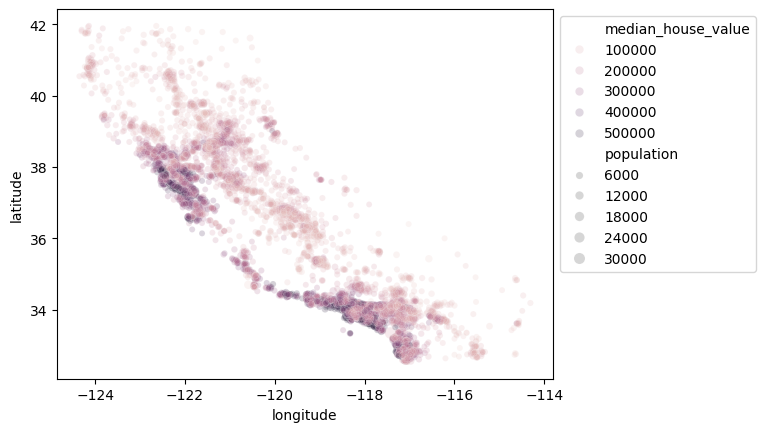

In [41]:
ax = sns.scatterplot(data=train,
                
                    x="longitude",

                    y="latitude",
                
                    size="population",

                    alpha=0.2,

                    hue="median_house_value",

                    )

sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))

In [42]:
# Correlations

In [43]:
train.corr()["median_house_value"]

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

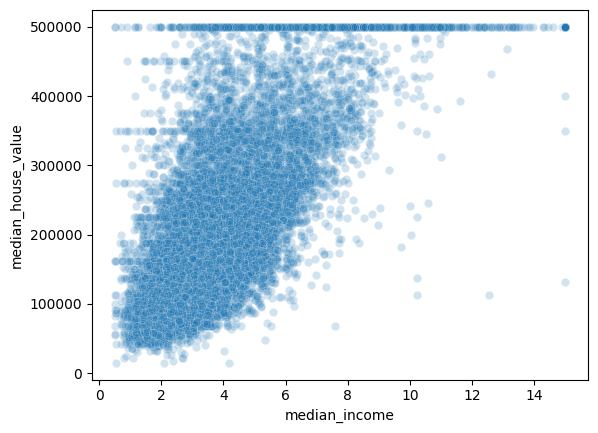

In [44]:
sns.scatterplot(data=train,x="median_income",
                y="median_house_value",
                alpha=0.2
                )

In [45]:
#Attribute Combinations

In [46]:
train["rooms_per_house"] = train["total_rooms"]/train["households"]
train["bedrooms_ratio"] = train["total_bedrooms"]/train["total_rooms"]
train["pople_per_house"]=train["population"]/train["households"]
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,identifier,rooms_per_house,bedrooms_ratio,pople_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,-121292.02,5.722426,0.185031,3.209559


In [47]:
train.corr()["median_house_value"]

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
rooms_per_house       0.159500
bedrooms_ratio       -0.255178
pople_per_house      -0.027110
Name: median_house_value, dtype: float64

In [48]:
#Prepare Data

In [49]:
train_features = train.drop("median_house_value",axis = 1)
train_target = train["median_house_value"]
train_target

16415    158300.0
1279     253900.0
7741     209000.0
4425     137500.0
1283      93800.0
           ...   
1221     104000.0
12640     75400.0
5747     354700.0
16224     84600.0
8967     336000.0
Name: median_house_value, Length: 16512, dtype: float64

In [50]:
#Data Cleaning 